In [ ]:
import pickle
import pandas
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import numpy as np
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
from gensim.parsing.preprocessing import preprocess_string
import gensim.downloader as api
from gensim.models import Word2Vec

# import torch 
# if torch.cuda.is_available():
#   device = torch.device("cuda")
# else:
#   device = torch.device("cpu")
  
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
with open('drive/MyDrive/CS247/train_data.pkl', 'rb') as fid:
     train_data= pickle.load(fid)

with open('drive/MyDrive/CS247/valid_data.pkl', 'rb') as fid:
     valid_data= pickle.load(fid)

with open('drive/MyDrive/CS247/test_data.pkl', 'rb') as fid:
     test_data= pickle.load(fid)

with open('drive/MyDrive/CS247/data.pkl', 'rb') as fid:
     data= pickle.load(fid)

In [ ]:
train_data.info()
train_data.head(3)
valid_data.head(3)
test_data.head(3)

In [ ]:
nan_value = float("NaN")

train_data.replace("", nan_value, inplace=True)

train_data.dropna(inplace=True)

valid_data.replace("",nan_value,inplace=True)
valid_data.dropna(inplace=True)

data.replace("",nan_value,inplace=True)
data.dropna(inplace=True)

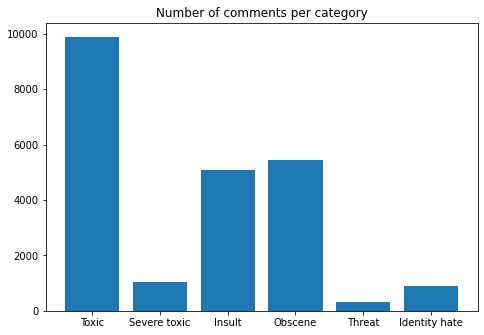

In [ ]:
#DATA VISUALIZATION

#Plot the number of examples in each category

toxic = train_data["toxic"].sum(0)
severe_toxic = train_data["severe_toxic"].sum(0)
insult = train_data["insult"].sum(0)
obscene = train_data["obscene"].sum(0)
threat = train_data["threat"].sum(0)
identity_hate = train_data["identity_hate"].sum(0)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
labels = ['Toxic', 'Severe toxic', 'Insult', 'Obscene', 'Threat', 'Identity hate']
rate = [toxic,severe_toxic,insult,obscene,threat,identity_hate]
ax.bar(labels,rate)
plt.title("Number of comments per category")
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6bd25d8310>]],
      dtype=object)

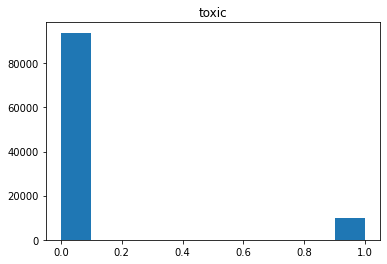

In [ ]:
#Plot the histogram for toxic comment to show class imbalance

train_data.hist('toxic',grid=False)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6bd13ac050>]],
      dtype=object)

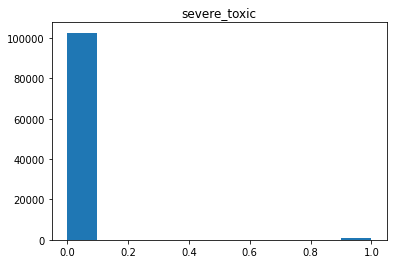

In [ ]:
train_data.hist('severe_toxic',grid=False)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6bd11fc3d0>]],
      dtype=object)

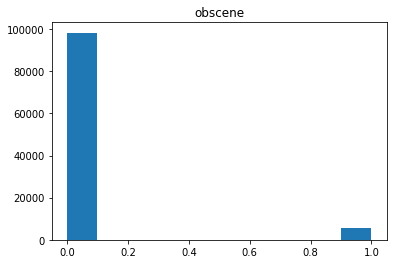

In [ ]:
train_data.hist('obscene',grid=False)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6bd130a090>]],
      dtype=object)

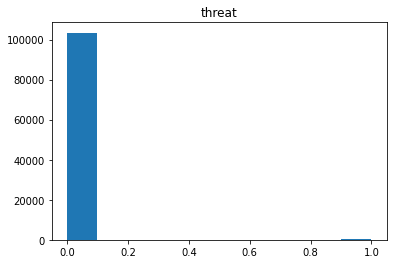

In [ ]:
train_data.hist('threat',grid=False)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6bd0ceead0>]],
      dtype=object)

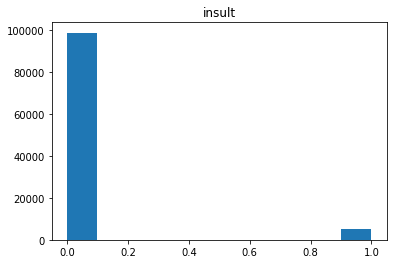

In [ ]:
train_data.hist('insult',grid=False)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6bd0a4d3d0>]],
      dtype=object)

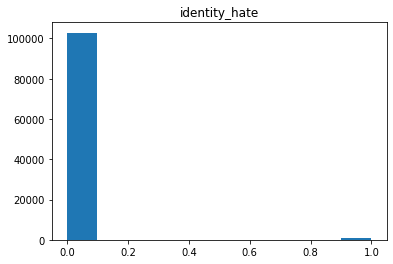

In [ ]:
train_data.hist('identity_hate',grid=False)

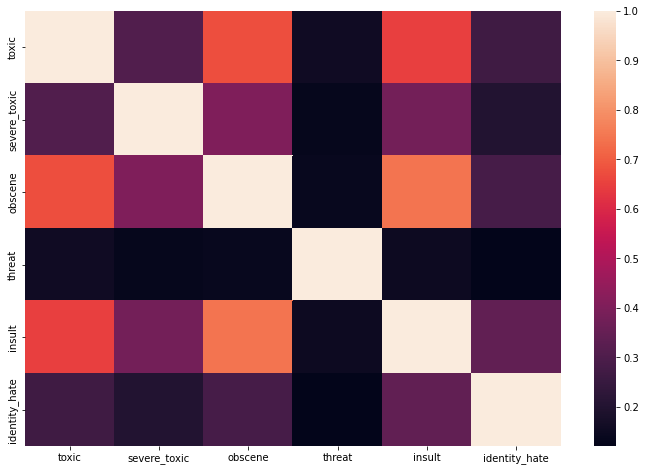

In [ ]:
#Plot correlation matrix

import seaborn as sns
corr = train_data.corr() 
plt.subplots(figsize=(12,8))
sns.heatmap(corr, xticklabels=corr.columns,
yticklabels=corr.columns)

In [ ]:
#Find some correlations among the toxicity categories

toxic_and_severe = train_data.loc[(train_data['toxic'] == 1) & (train_data['severe_toxic'] == 1)]

ts = toxic_and_severe['id'].count()

print("Number of toxic&severe_toxic comments: {}" .format(ts))

Number of toxic&severe_toxic comments: 1038


Exploring no labelled comments 

In [ ]:
df_negative_all= data.loc[(data['obscene'] == 0) & (data['toxic'] ==0) & (data['severe_toxic'] ==0)& (data['insult'] == 0) & (data['threat'] == 0) & (data['identity_hate'] == 0) ]



In [ ]:
text = " ".join(comment for comment in df_negative_all.comment_text_wp)

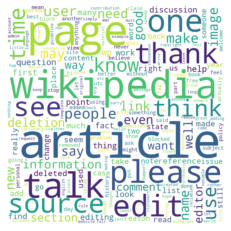

In [ ]:
word_cloud = WordCloud(collocations = False, background_color = 'white',width=1000,height=1000,min_font_size=10).generate(text)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:

toxic = data.loc[data["toxic"] == 1]
severe_toxic = data.loc[data["severe_toxic"]==1]
insult = data.loc[data["insult"] == 1]
obscene = data.loc[data["obscene"] == 1]
threat = data.loc[data["threat"] == 1]
identity_hate = data.loc[data["identity_hate"] ==1]

In [ ]:
import plotly.express as px
labels = ['Toxic', 'Severe toxic', 'Insult', 'Obscene', 'Threat', 'Identity hate','Negative_samples']
colors = ['blue'] * 7
colors[6] = 'crimson'
fig = px.bar(x=labels,y=[len(toxic),len(severe_toxic),len(insult),len(obscene),len(threat),len(identity_hate),len(df_negative_all)],color=colors)
fig.show()

In [ ]:
imbalanced_toxic_percentage = len(toxic) / len(df_negative_all)
imbalanced_severe_toxic_percentage = len(severe_toxic) / len(df_negative_all)
imbalanced_obscene_percentage = len(obscene) / len(df_negative_all)
imbalanced_insult_percentage = len(insult) / len(df_negative_all)
imbalanced_threat_percentage = len(threat) / len(df_negative_all)
imbalanced_identity_hate_percentage = len(identity_hate) / len(df_negative_all)
percentage_stats = [imbalanced_toxic_percentage ,imbalanced_severe_toxic_percentage ,imbalanced_obscene_percentage ,imbalanced_insult_percentage,imbalanced_threat_percentage,imbalanced_identity_hate_percentage]

In [ ]:
for p in percentage_stats:
    print(p)

0.1067345941796357
0.011131272245097355
0.058964338055691255
0.05497243352641496
0.003335892246493126
0.009805289971386699
